<a href="https://colab.research.google.com/github/toanpham31231023715-cyber/toanpham.githhub.io/blob/main/%5BTh%E1%BB%B1c_h%C3%A0nh%5D_Hu%E1%BA%A5n_luy%E1%BB%87n_m%C3%B4_h%C3%ACnh/Ex3_Classification_Wine_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Wine Classification with Decision Tree Algorithm**

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import datasets


**Wine Dataset ¶**

Wine dataset are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined
the quantities of 13 constituents found in each of the three types of wines. Our task is to classify three kinds of wines based on these constituents below:
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline
Source: https://archive.ics.uci.edu/ml/datasets/wine (https://archive.ics.uci.edu/ml/datasets/wine)

In [2]:
# Load dataset
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [3]:
data_df = pd.DataFrame(X, columns=dataset.feature_names)
data_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


**Modeling**

In this example, we choose Decision Tree model to classify three kinds of wine. To do that, we use the DecisionTreeClassifer class in sklearn with
max_depth=4 . max_depth is the maximum depth of the tree

In [4]:
model = DecisionTreeClassifier(max_depth=4, )
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

Prediction and Evaluation

In [5]:
y_pred = model.predict(X_test)
print(f"Classification report for DecisionTree:\n"
 f"{metrics.classification_report(y_test, y_pred)}\n")

Classification report for DecisionTree:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.89      0.89      0.89        18
           2       1.00      0.93      0.96        14

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45




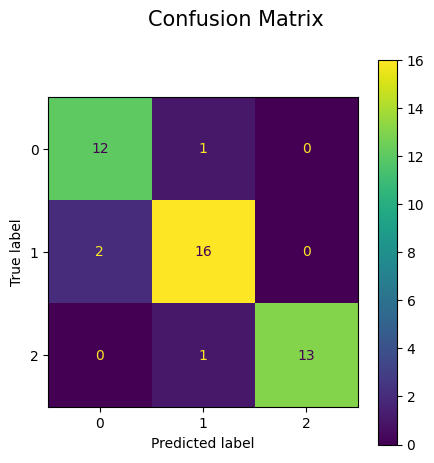

In [7]:
 # Plot the confusion matrix
plt.figure(figsize=(5, 5))
ax = plt.gca()
# Use ConfusionMatrixDisplay.from_estimator instead of plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax)
_ = disp.figure_.suptitle("Confusion Matrix", fontsize=15)

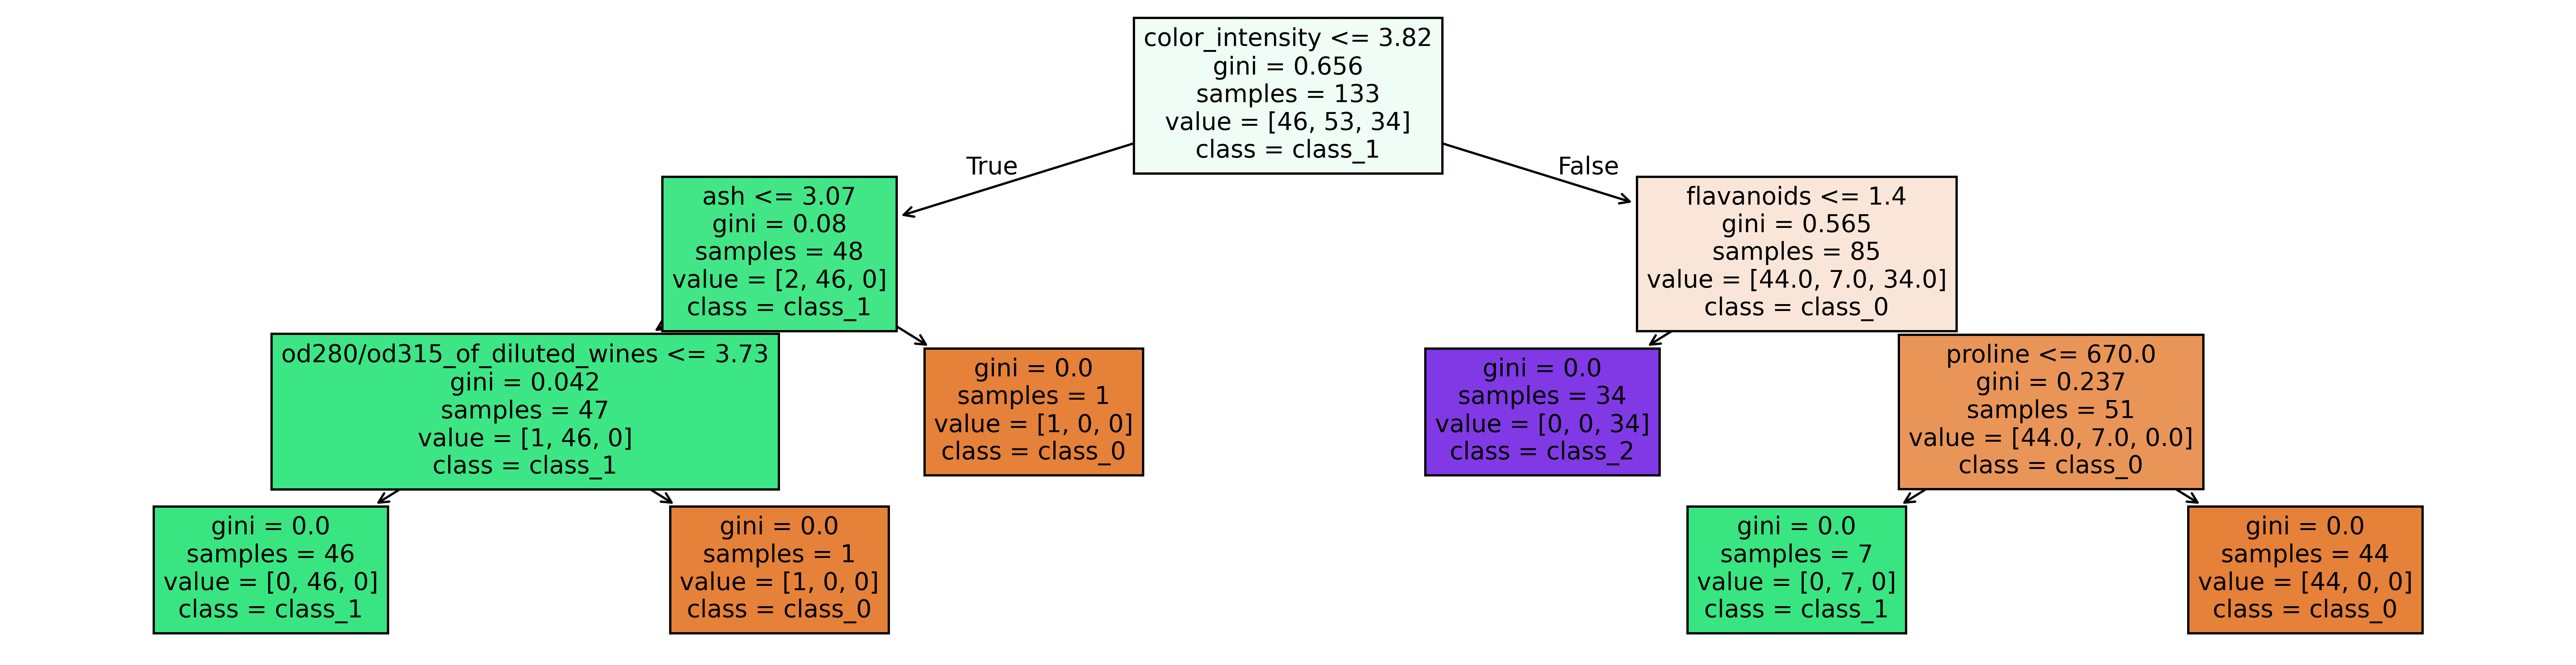

In [8]:
# Show Decision Tree Decision
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20, 5), dpi=500)
tree.plot_tree(model,
 feature_names =dataset.feature_names,
 class_names=dataset.target_names,
 filled = True);


Decision boundary

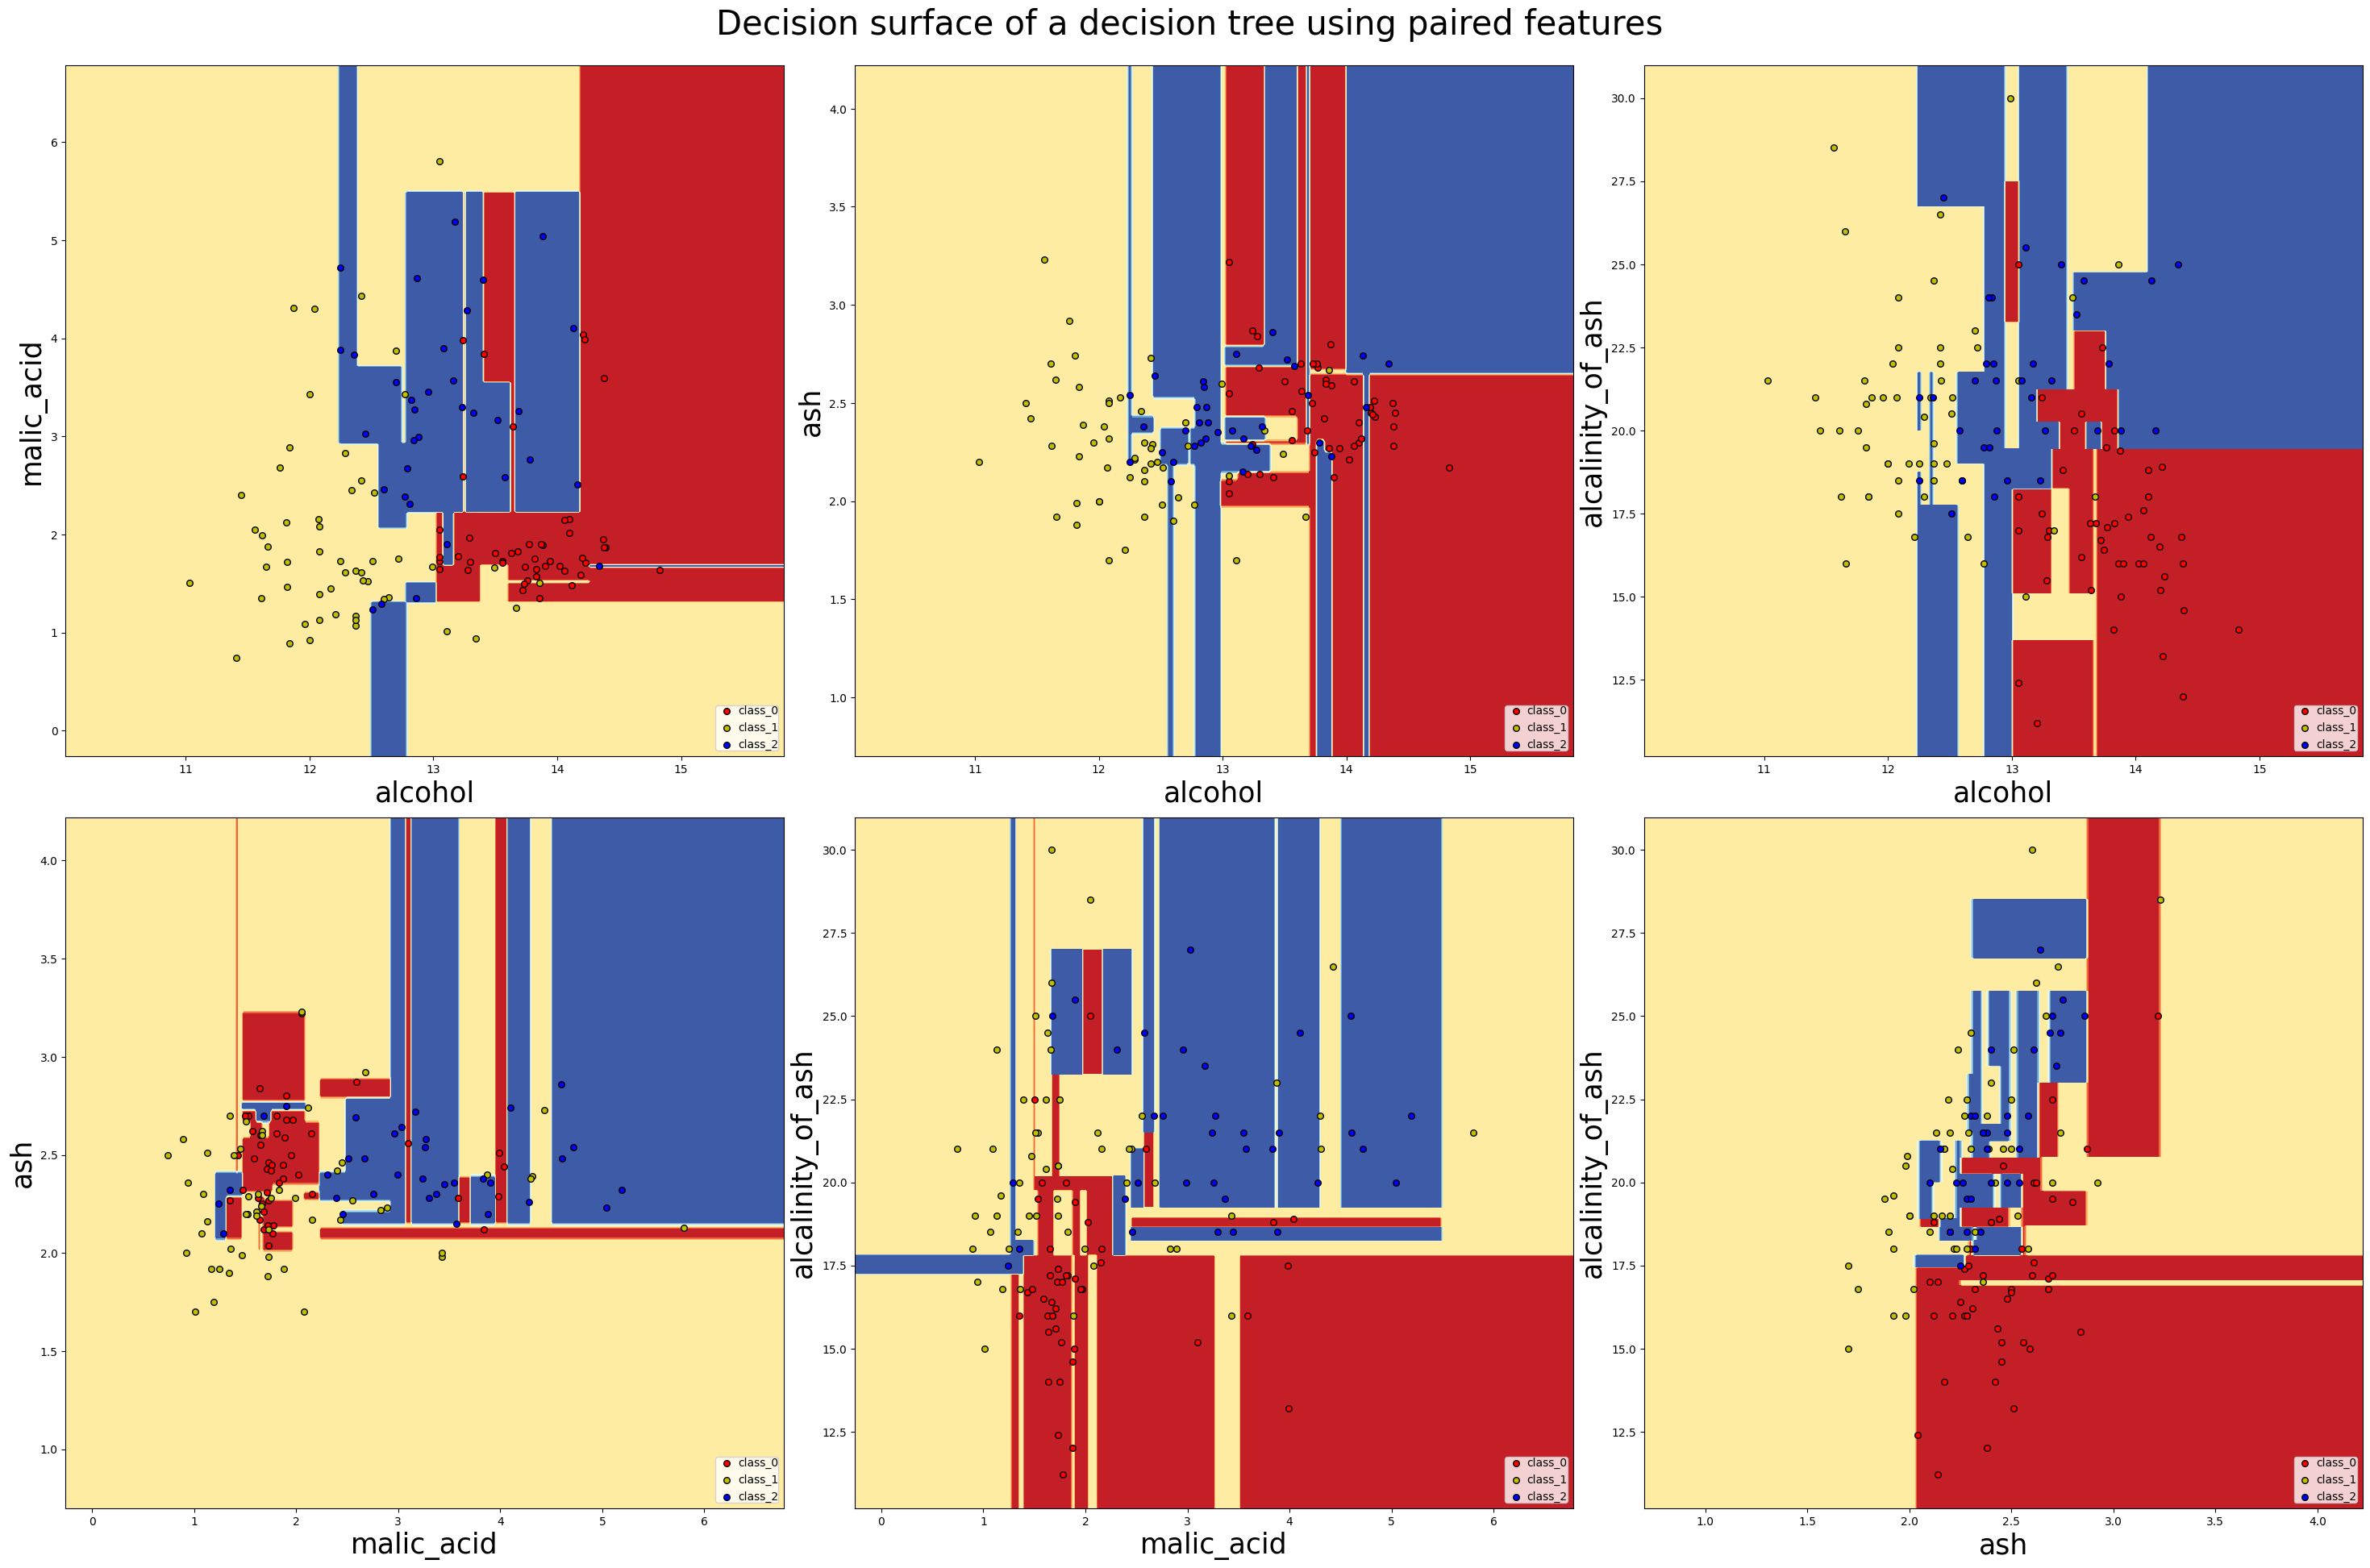

In [11]:
# Plot the decision boundary
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
font = {'size' : 25}
plt.figure(figsize=(30, 20))
plt.suptitle("Decision surface of a decision tree using paired features", **{'size': 30})
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
 [1, 2], [1, 3], [2, 3]]):
    plt.subplot(2, 3, pairidx + 1)
    X = X_train[:, pair]
    clf = DecisionTreeClassifier().fit(X, y_train)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    plt.xlabel(dataset.feature_names[pair[0]], **font)
    plt.ylabel(dataset.feature_names[pair[1]], **font)

    # Show the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=dataset.target_names[i],
                    edgecolor='black', s=30)
        plt.legend(loc='lower right', borderpad=0, handletextpad=0)

END